In [1]:
import pandas as pd

#csv with only animal data
df = pd.read_csv('2011_2024.csv')

C:\Users\Rnema\AppData\Local\Temp\ipykernel_28264\3676657450.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2011_2024.csv')


In [2]:
df.head()

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,9,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,...,Dorchester,7,Ward 16,1602,305 Freeport St,2122.0,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated
1,21,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,...,Greater Mattapan,9,Ward 18,1801,10 Ledgebrook Rd,2126.0,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call
2,98,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,...,Charlestown,2,Ward 2,0202,114 Sixteenth St,2129.0,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call
3,225,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,...,Dorchester,8,Ward 15,1504,10 Hendry St,2125.0,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated
4,264,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,...,Hyde Park,10,Ward 18,1813,69 Davison St,2136.0,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated


In [3]:
#print(df.columns)
#print(df.head(10))
df_longitudinal = df[['latitude', 'longitude']]
df_longitudinal
df_longitudinal = df_longitudinal.dropna()

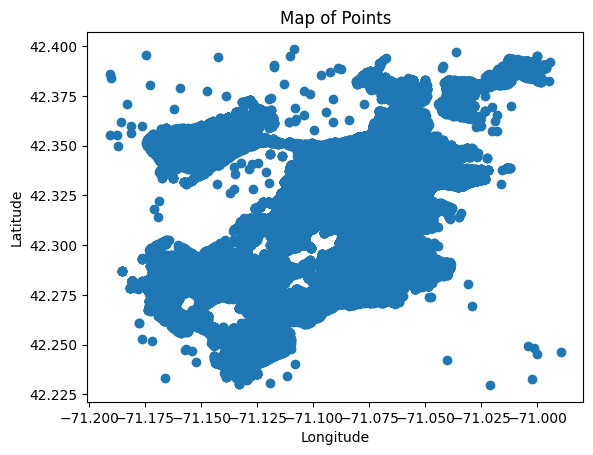

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Points')
plt.show()

In [5]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

# Create a map object
m = folium.Map(location=[df_longitudinal['latitude'].mean(), df_longitudinal['longitude'].mean()], zoom_start=10)

# Add points to the map
# marker_cluster = MarkerCluster().add_to(m)
# for idx, row in df_longitudinal.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

heat_data = [[row['latitude'], row['longitude']] for index, row in df_longitudinal.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m

In [13]:
df.columns

Index(['_id', 'case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt',
       'on_time', 'case_status', 'closure_reason', 'case_title', 'subject',
       'reason', 'type', 'queue', 'department', 'submitted_photo',
       'closed_photo', 'location', 'fire_district', 'pwd_district',
       'city_council_district', 'police_district', 'neighborhood',
       'neighborhood_services_district', 'ward', 'precinct',
       'location_street_name', 'location_zipcode', 'latitude', 'longitude',
       'geom_4326', 'source'],
      dtype='object')

       on_time              open_dt  location_zipcode
6      OVERDUE  2011-07-01 12:16:32            2124.0
12     OVERDUE  2011-07-03 04:08:16            2126.0
16     OVERDUE  2011-07-04 05:57:06            2124.0
150    OVERDUE  2011-07-26 04:25:33            2122.0
321    OVERDUE  2011-08-29 07:22:26            2121.0
...        ...                  ...               ...
83758  OVERDUE  2024-02-02 09:23:00               NaN
83768  OVERDUE  2024-02-08 07:16:00               NaN
83800  OVERDUE  2024-01-31 10:58:00            2119.0
83810  OVERDUE  2024-01-03 06:51:00               NaN
83812  OVERDUE  2024-01-03 12:26:00            2130.0

[3891 rows x 3 columns]


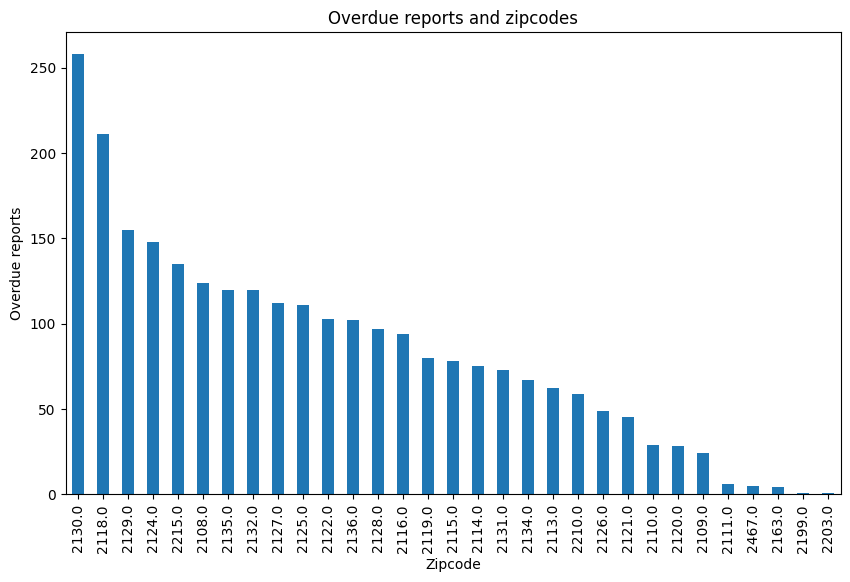

In [27]:
overdue_df = df[['on_time', 'open_dt','location_zipcode']]
overdue_df['on_time'].value_counts()
overdue_df = overdue_df[overdue_df['on_time'] == 'OVERDUE']

print(overdue_df)

overdue_zipcodes = overdue_df['location_zipcode'].value_counts()

plt.figure(figsize=(10, 6))
overdue_zipcodes.plot(kind='bar')
plt.title('Overdue reports and zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Overdue reports')
plt.show()


In [35]:
open_call_df = df[['case_status', 'open_dt','location_zipcode']]
open_call_df.dropna()

open_call_df['open_dt'] = open_call_df['open_dt'].apply(pd.to_datetime)

open_call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83835 entries, 0 to 83834
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   case_status       83835 non-null  object        
 1   open_dt           83835 non-null  datetime64[ns]
 2   location_zipcode  67668 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.9+ MB


C:\Users\Rnema\AppData\Local\Temp\ipykernel_15516\3676313366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_call_df['open_dt'] = open_call_df['open_dt'].apply(pd.to_datetime)


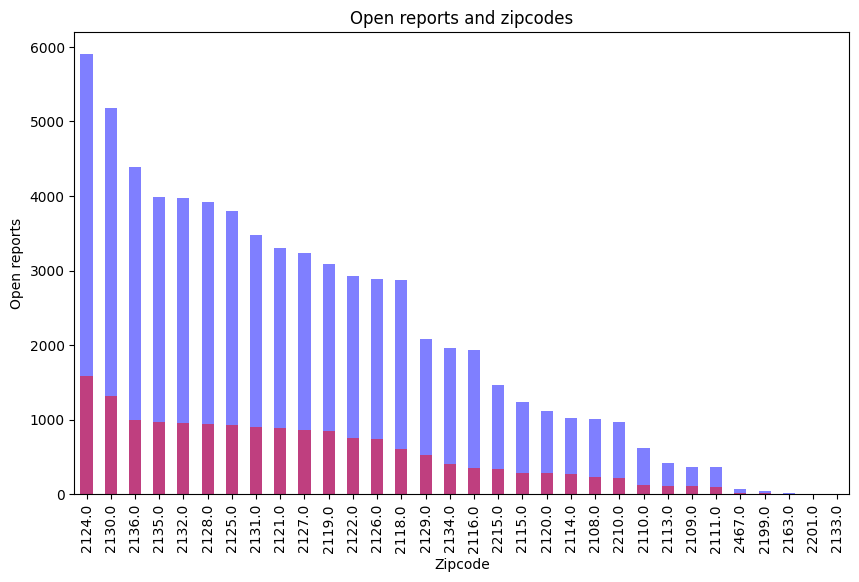

In [43]:
cut_off_date = pd.to_datetime('2024-01-01 00:00:00')
open_call_df = open_call_df[(open_call_df['case_status'] == 'Open') & (open_call_df['open_dt'] < cut_off_date)]
open_zipcodes = open_call_df['location_zipcode'].value_counts()

total_reports_location = df['location_zipcode'].value_counts()


plt.figure(figsize=(10, 6))
total_reports_location.plot(kind='bar', color='blue', alpha=0.5, label='Total Reports')

open_zipcodes.plot(kind='bar', color='red', alpha=0.5, label='Open Reports')


plt.title('Open reports and zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Open reports')
plt.show()

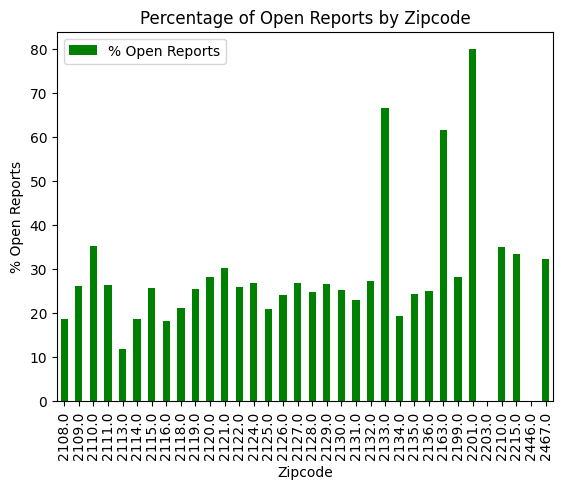

In [44]:
percentage_open_reports = (open_zipcodes / total_reports_location) * 100
percentage_open_reports.plot(kind='bar', color='green', label='% Open Reports')


plt.title('Percentage of Open Reports by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('% Open Reports')
plt.legend()
plt.show()